In [1]:
import pandas as pd

In [2]:
fec=pd.read_csv('C:\\Users\\Anu\\juypternotebook\\pydata-book-2nd-edition\\datasets\\fec\\P00000001-ALL.csv')
fec.info()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [3]:
fec.iloc[10]

cmte_id                       C00410118
cand_id                       P20002978
cand_nm              Bachmann, Michelle
contbr_nm            ATCHLEY, JR, KEITH
contbr_city                        MESA
contbr_st                            AZ
contbr_zip                        85215
contbr_employer                    NONE
contbr_occupation               RETIRED
contb_receipt_amt                   250
contb_receipt_dt              22-JUN-11
receipt_desc                        NaN
memo_cd                             NaN
memo_text                           NaN
form_tp                           SA17A
file_num                         736166
Name: 10, dtype: object

In [4]:
unique_cands=fec.cand_nm.unique()
len(unique_cands)

13

In [5]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [6]:
parties={'Bachmann, Michelle':'Republican',
        'Cain, Herman':'Republican',
        'Gingrich, Newt':'Republican',
        'Huntsman, Jon':'Republican',
        'Johnson, Gary Earl':'Republican',
        'McCotter, Thaddeus G':'Republican',
        'Obama, Barack':'Democrat',
        'Paul, Ron':'Republican',
        'Perry, Rick':'Republican',
        "Roemer, Charles E. 'Buddy' III":'Republican',
        'Romney, Mitt':'Republican',
        'Santorum, Rick':'Republican',
         'Pawlenty, Timothy':'Republican'
        }

In [7]:
fec['party']=fec.cand_nm.map(parties)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [8]:
fec.party.value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [9]:
(fec.contb_receipt_amt>0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [10]:
fec_mrbo=fec[fec.cand_nm.isin(['Romney, Mitt','Obama, Barack']) & fec.contb_receipt_amt>0]

In [11]:
fec_mrbo.receipt_desc.value_counts()

Refund                                                          4706
REATTRIBUTION / REDESIGNATION REQUESTED                          647
REATTRIBUTION TO SPOUSE                                          611
REATTRIBUTION FROM SPOUSE                                        601
REDESIGNATION TO GENERAL                                         395
REDESIGNATION FROM PRIMARY                                       393
SEE REATTRIBUTION                                                358
REATTRIBUTION REQUESTED                                          332
REATTRIBUTION TO SPOUSE / REDESIGNATION REQUESTED                  6
ATTRIBUTION TO PARTNERS REQUESTED / REDESIGNATION REQUESTED        3
REATTRIBUTION REQUESTED; REFUND TO BE ISSUED                       3
REATTRIBUTION REQUESTED/REFUND TO BE ISSUED                        3
REDESIGNATION FROM PRIMARY; REFUND TO BE ISSUED                    2
REATTRIBUTION / REDESIGNATION REQUESTED; REFUND TO BE ISSUED       2
REATTRIBUTION FROM SPOUSE / REDESI

In [12]:
fec_mrbo.contbr_occupation.value_counts()

RETIRED                                   177700
ATTORNEY                                   30190
INFORMATION REQUESTED                      24784
HOMEMAKER                                  19724
PHYSICIAN                                  17239
                                           ...  
SENIOR INVESTMENT MANAGER'S EQUITY ANA         1
SPECIAL PROJECT OFFICER 1                      1
METAL FABRICATOR                               1
RETIRED SCHOOL ADMINSTRATOR                    1
REAL ESTATE ACQUISITIONS                       1
Name: contbr_occupation, Length: 33605, dtype: int64

In [13]:
occ_mapping={'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
            'INFORMATION REQUESTED':'NOT PROVIDED',
            'INFORMATION REQUESTED (BEST EFFORTS)':'NOT PROVIDED',
            'C.E.O.':'CEO'}
f=lambda x:occ_mapping.get(x,x)
fec.contbr_occupation=fec.contbr_occupation.map(f)

In [14]:
emp_mapping={'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
            'INFORMATION REQUESTED':'NOT PROVIDED',
            'SELF':'SELF-EMPLOYED',
            'SELF EMPLOYED':'SELF-EMPLOYED'}
f=lambda x:emp_mapping.get(x,x)
fec.contbr_employer=fec.contbr_employer.map(f)

In [17]:
group=fec.pivot_table('contb_receipt_amt', index='contbr_occupation',columns=['party'], aggfunc=sum)
over_2mm=group[group.sum(1)>2000000]

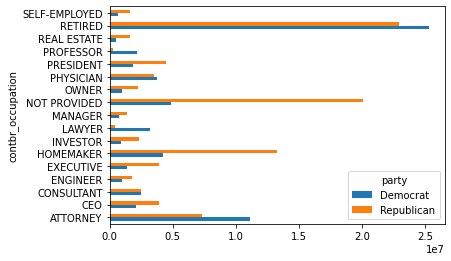

In [19]:
over_2mm.plot(kind='barh')

In [32]:
grouped=fec_mrbo.groupby(['cand_nm'])
def nlargest_n(group,key,n=5):
    totals= group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)
grouped.apply(nlargest_n,'contbr_occupation',10)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25270507.23
               ATTORNEY                                  11126932.97
               INFORMATION REQUESTED                      4849801.96
               HOMEMAKER                                  4243394.30
               PHYSICIAN                                  3732387.44
               LAWYER                                     3159391.87
               CONSULTANT                                 2459812.71
               PROFESSOR                                  2163571.08
               CEO                                        2069784.79
               PRESIDENT                                  1878009.95
Romney, Mitt   RETIRED                                   11266949.23
               INFORMATION REQUESTED PER BEST EFFORTS    11173374.84
               HOMEMAKER                                  8037250.86
               ATTORNEY                          

In [33]:
grouped.apply(nlargest_n,'contbr_employer',10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22665902.20
               SELF-EMPLOYED                             17038455.96
               NOT EMPLOYED                               8584118.70
               INFORMATION REQUESTED                      5036178.37
               HOMEMAKER                                  2599987.04
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    11827237.12
               RETIRED                                   11264701.35
               HOMEMAKER                                  8037000.86
               SELF-EMPLOYED                     

In [34]:
import numpy as np
bins=np.array([0,1,10,1000,10000,100000,1000000,10000000])
labels=pd.cut(fec_mrbo.contb_receipt_amt,bins)
labels

411       (10, 1000]
412       (10, 1000]
413       (10, 1000]
414       (10, 1000]
415       (10, 1000]
             ...    
701381    (10, 1000]
701382    (10, 1000]
701383       (1, 10]
701384    (10, 1000]
701385    (10, 1000]
Name: contb_receipt_amt, Length: 700366, dtype: category
Categories (7, interval[int64]): [(0, 1] < (1, 10] < (10, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [39]:
grouped=fec_mrbo.groupby(['cand_nm',labels])
grouped['contb_receipt_amt'].size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 1000]",526271,75210
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [47]:
buck_sum=grouped['contb_receipt_amt'].sum().unstack(0)
norm_sum=buck_sum.div(buck_sum.sum(axis=1),axis=0)
norm_sum

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 1000]",0.755114,0.244886
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


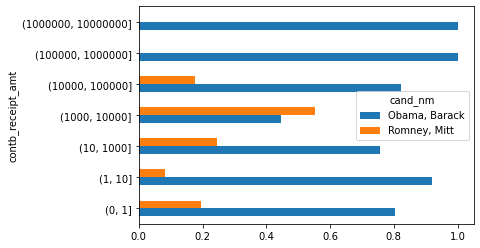

In [48]:
norm_sum.plot(kind='barh')

In [54]:
grouped=fec_mrbo.groupby(['cand_nm','contbr_st'])
totals_st=grouped.contb_receipt_amt.sum().unstack(level=0)

In [57]:
totals_st=totals_st[totals_st.sum(1)>10000]
totals_st[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,49505.00,135.00
AE,42973.75,5680.00
AK,275353.15,86204.24
AL,537835.48,504882.08
AP,37130.50,1655.00
AR,324802.28,105351.50
AZ,1484241.84,1850484.23
CA,23370680.84,10908232.46
CO,2104551.38,1477810.82


In [58]:
percent=totals_st.div(totals_st.sum(1),axis=0)
percent

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,0.997280,0.002720
AE,0.883257,0.116743
AK,0.761575,0.238425
AL,0.515802,0.484198
AP,0.957329,0.042671
AR,0.755084,0.244916
AZ,0.445087,0.554913
CA,0.681780,0.318220
CO,0.587476,0.412524


In [59]:
percent.sum()

cand_nm
Obama, Barack    36.076329
Romney, Mitt     22.923671
dtype: float64